<a href="https://colab.research.google.com/github/paolofesta/prove/blob/master/tentativianalisifollowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns
from  matplotlib.ticker import PercentFormatter



In [ ]:
datasent=pd.read_csv('/content/datasent')

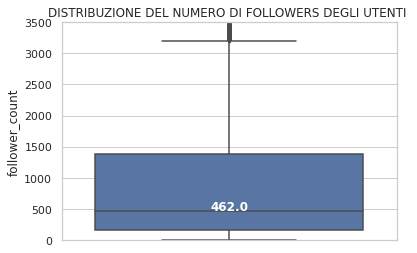

In [ ]:
box_plot =sns.boxplot(data=datasent,y='follower_count',x='language',palette=['b'])
plt.ylim(0,3500)
plt.xlabel(None)
box_plot.set(xticklabels=[])
medians = datasent.groupby(['language'])['follower_count'].median()
vertical_offset = datasent['follower_count'].median() * 0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='medium',color='w',weight='semibold')
    plt.title('DISTRIBUZIONE DEL NUMERO DI FOLLOWERS DEGLI UTENTI ') 

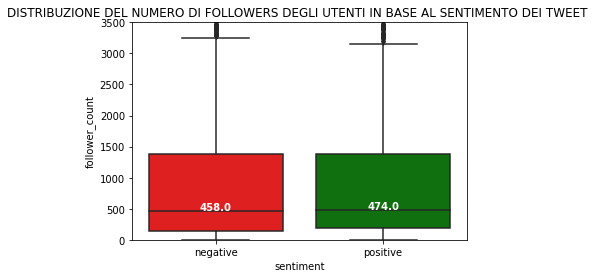

In [ ]:



box_plot =sns.boxplot(data=datasent,y='follower_count',x='sentiment',palette=['r','g'])
plt.ylim(0,3500)

medians = datasent.groupby(['sentiment'])['follower_count'].median()
vertical_offset = datasent['follower_count'].median() * 0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='medium',color='w',weight='semibold')
    plt.title('DISTRIBUZIONE DEL NUMERO DI FOLLOWERS DEGLI UTENTI IN BASE AL SENTIMENTO DEI TWEET ') 

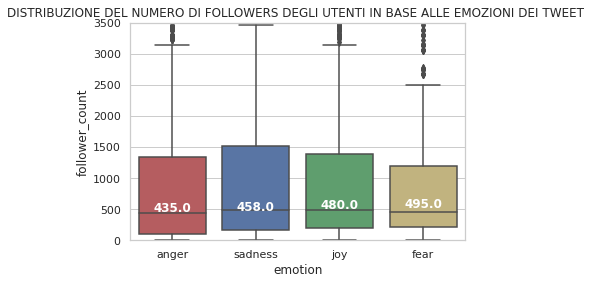

In [ ]:



box_plot =sns.boxplot(data=datasent,y='follower_count',x='emotion',palette=['r','b','g','y'])
plt.ylim(0,3500)

medians = datasent.groupby(['emotion'])['follower_count'].median()
vertical_offset = datasent['follower_count'].median() * 0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='medium',color='w',weight='semibold')
    plt.title('DISTRIBUZIONE DEL NUMERO DI FOLLOWERS DEGLI UTENTI IN BASE ALLE EMOZIONI DEI TWEET ') 

In [ ]:
#ora wordcloud poi differenze tra le classi

In [ ]:
datafoll=datasent
datafolls=datafoll.loc[datafoll['follower_count']<=462]
datafolls['classe']="0-462 followers"
datafollb=datafoll.loc[datafoll['follower_count']>462]
datafollb['classe']="più di 462 followers"
datafoll1=pd.concat([datafolls,datafollb])
datafoll1


In [ ]:
wordss=pd.Series(datafolls['cleaned_text']).astype('string').str.cat(sep=' ')

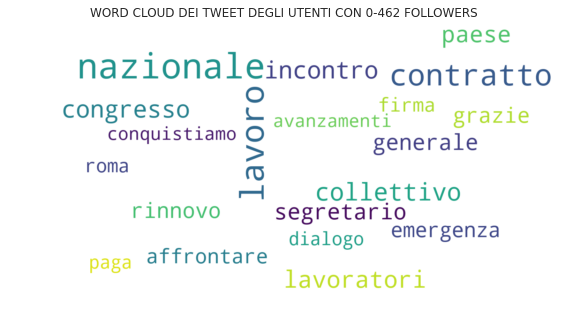

In [ ]:

wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=100,max_words=20,collocations=False, background_color='white').generate(wordss)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('WORD CLOUD DEI TWEET DEGLI UTENTI CON 0-462 FOLLOWERS ')   
print()


In [ ]:
wordsb=pd.Series(datafollb['cleaned_text']).astype('string').str.cat(sep=' ')

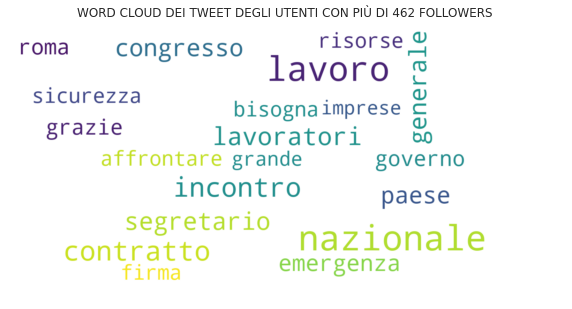

In [ ]:

wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=100,max_words=20,collocations=False, background_color='white').generate(wordsb)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('WORD CLOUD DEI TWEET DEGLI UTENTI CON PIÙ DI 462 FOLLOWERS ')   
print()

In [ ]:
#datafoll1.loc[(datafoll1['classe']=='0-462 followers')].count()#=3241
#datafoll1.loc[(datafoll1['classe']=='0-462 followers') & (datafoll1['sentiment']=='negative')].count()#=2040
#datafoll1.loc[(datafoll1['classe']=='0-462 followers') & (datafoll1['sentiment']=='positive')].count()#=1201
#datafoll1.loc[(datafoll1['classe']=='più di 462 followers')].count()#=3202
#datafoll1.loc[(datafoll1['classe']=='più di 462 followers') & (datafoll1['sentiment']=='negative')].count()#=1974
#datafoll1.loc[(datafoll1['classe']=='più di 462 followers') & (datafoll1['sentiment']=='positive')].count()#=1228

In [ ]:
c={'percent':[(2040/3241)*100,(1201/3241)*100,(1974/3202)*100,(1228/3202)*100],'sentiment':['negative','positive','negative','positive'],'classe':['0-462 followers','0-462 followers','più di 462 followers','più di 462 followers']}
df=pd.DataFrame(data=c)
df['percent']=df['percent'].astype('int')



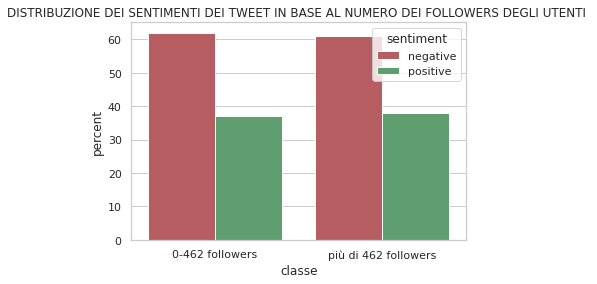

In [ ]:
sns.barplot(data=df,x='classe',y='percent',hue='sentiment',palette=['r','g']).set_title('DISTRIBUZIONE DEI SENTIMENTI DEI TWEET IN BASE AL NUMERO DEI FOLLOWERS DEGLI UTENTI ') 
print()

In [ ]:
#datafoll1.loc[(datafoll1['classe']=='0-462 followers')].count()#=3241
#datafoll1.loc[(datafoll1['classe']=='0-462 followers') & (datafoll1['emotion']=='sadness')].count()#=491
#datafoll1.loc[(datafoll1['classe']=='0-462 followers') & (datafoll1['emotion']=='fear')].count()#=394
#datafoll1.loc[(datafoll1['classe']=='0-462 followers') & (datafoll1['emotion']=='anger')].count()#=1007
#datafoll1.loc[(datafoll1['classe']=='0-462 followers') & (datafoll1['emotion']=='joy')].count()#=1394
#datafoll1.loc[(datafoll1['classe']=='più di 462 followers')].count()#=3202
#datafoll1.loc[(datafoll1['classe']=='più di 462 followers') & (datafoll1['emotion']=='sadness')].count()#=513
#datafoll1.loc[(datafoll1['classe']=='più di 462 followers') & (datafoll1['emotion']=='fear')].count()#=375
#datafoll1.loc[(datafoll1['classe']=='più di 462 followers') & (datafoll1['emotion']=='anger')].count()#=914
#datafoll1.loc[(datafoll1['classe']=='più di 462 followers') & (datafoll1['emotion']=='joy')].count()#=1400


In [ ]:
z={'percent':[(491/3241)*100,(394/3241)*100,(1007/3241)*100,(1394/3241)*100,(513/3202)*100,(375/3202)*100,(914/3202)*100,(1400/3202)*100],'emotion':['sadness','fear','anger','joy','sadness','fear','anger','joy'],'classe':['0-462 followers','0-462 followers','0-462 followers','0-462 followers','più di 462 followers','più di 462 followers','più di 462 followers','più di 462 followers']}
df1=pd.DataFrame(data=z)




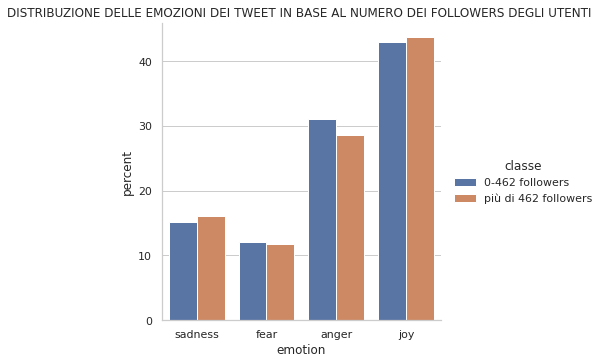

In [ ]:
sns.catplot(data=df1,x='emotion',y='percent',hue='classe',kind='bar', dodge=True)
plt.title('DISTRIBUZIONE DELLE EMOZIONI DEI TWEET IN BASE AL NUMERO DEI FOLLOWERS DEGLI UTENTI ') 
 print()



In [ ]:
# riassumendo, le differenze sono quasi nulle, o il numero di follower è una variabile non rilevante o ho sbagliato a dividere le due classi

In [ ]:
#tentiamo approccio alternativo